# Análise Interativa do Relatório de Notas
Este notebook realiza a análise dos dados consolidados de notas dos alunos.

### 1. Importação das Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fpdf import FPDF
from datetime import datetime
import json

# Configuração do estilo dos gráficos
sns.set_theme(style="whitegrid")

### 2. Carregamento e Preparação dos Dados
Os dados são carregados e as colunas são preparadas para a análise.

In [2]:
file_path = 'output/relatorio_consolidado.csv'
try:
    df = pd.read_csv(file_path)
    
    # --- AJUSTE DAS COLUNAS --- 
    # Renomeia as colunas para um padrão consistente (minúsculas)
    df.columns = ['curso', 'disciplina', 'aluno', 'av1', 'av2', 'media_final']
    
    # Cria a coluna 'status' com base na média final
    # Regra: Aprovado se media_final >= 6, senão Reprovado. Ajuste se necessário.
    df['status'] = np.where(df['media_final'] >= 6, 'Aprovado', 'Reprovado')
    # ---------------------------
    
    print("Dados carregados e preparados com sucesso!")
    display(df.head())
    
except FileNotFoundError:
    print(f"Erro: O arquivo não foi encontrado em '{file_path}'.")
    print("Por favor, execute o script de consolidação de relatórios primeiro.")
    df = pd.DataFrame() # Cria um DataFrame vazio para evitar erros

Dados carregados e preparados com sucesso!


,curso,disciplina,aluno,av1,av2,media_final,status
0,Técnico em Programação de Jogos Digitais,Animação 2D,Gilmara Da Cruz Carlota,9.0,8.0,7.4,Aprovado
1,Técnico em Programação de Jogos Digitais,Animação 2D,Rebeca Da Silva Barbosa,10.0,9.0,8.4,Aprovado
2,Técnico em Programação de Jogos Digitais,Animação 2D,Giovanna De Aragão Alves Dos Santos,0.0,0.0,0.2,Reprovado
3,Técnico em Programação de Jogos Digitais,Animação 2D,Luciano De França Pereira,9.0,7.0,6.0,Aprovado
4,Técnico em Programação de Jogos Digitais,Animação 2D,Rian De Sousa Paes Landim,9.0,8.0,6.1,Aprovado


### 3. Dicionário Dinâmico de Cursos e Disciplinas
Para facilitar a seleção, criamos um dicionário que mapeia cada curso às suas respectivas disciplinas.

In [3]:
curso_disciplinas_dict = {}
if not df.empty:
    # Agrupa por curso e coleta as disciplinas únicas para cada um
    curso_disciplinas_dict = df.groupby('curso')['disciplina'].unique().apply(list).to_dict()
    
    # Imprime o dicionário de forma legível
    print("Dicionário de Cursos e Disciplinas disponíveis:")
    print(json.dumps(curso_disciplinas_dict, indent=2, ensure_ascii=False))

Dicionário de Cursos e Disciplinas disponíveis:
{
  "Técnico em Desenvolvimento de Sistemas": [
    "Arquitetura de Computadores",
    "Fundamentos de Banco de Dados",
    "Fundamentos da Tecnologia da Informação",
    "Fundamentos de Redes",
    "Tecnologias, AVA e Métodos de Aprendizagem"
  ],
  "Técnico em Programação de Jogos Digitais": [
    "Animação 2D",
    "Fundamentos de Jogos Digitais",
    "Game Design",
    "INTJ",
    "Lógica de Programação",
    "Tecnologias, AVA e Métodos de Aprendizagem"
  ]
}


### 4. Seleção de Curso e Disciplina
**Copie um curso e uma de suas disciplinas do dicionário acima e cole nos valores das variáveis abaixo.**

In [16]:
# --- Altere aqui para selecionar (use o dicionário acima como guia) --- #
curso_selecionado = 'Técnico em Desenvolvimento de Sistemas' # Exemplo: Copie uma chave do dicionário
disciplina_selecionada = 'Fundamentos de Redes' # Exemplo: Copie um item da lista do curso escolhido
# -------------------------------------------------------------------- #

# Filtrando o DataFrame
df_filtrado = pd.DataFrame()
if curso_selecionado in curso_disciplinas_dict and disciplina_selecionada in curso_disciplinas_dict[curso_selecionado]:
    df_filtrado = df[(df['curso'] == curso_selecionado) & (df['disciplina'] == disciplina_selecionada)].copy()
    print(f"Exibindo dados para o curso: {curso_selecionado}")
    print(f"Disciplina: {disciplina_selecionada}")
else:
    print(f"Combinação de curso e disciplina não encontrada. Verifique os valores selecionados.")
    print(f"Curso selecionado: '{curso_selecionado}'")
    print(f"Disciplina selecionada: '{disciplina_selecionada}'")

Exibindo dados para o curso: Técnico em Desenvolvimento de Sistemas
Disciplina: Fundamentos de Redes


### 5. Lista de Notas por Disciplina

In [17]:
if not df_filtrado.empty:
    colunas_para_exibir = ['aluno', 'av1', 'av2', 'media_final', 'status']
    display(df_filtrado[colunas_para_exibir].reset_index(drop=True))
else:
    print("Nenhum dado encontrado para a seleção atual.")

,aluno,av1,av2,media_final,status
0,Sarah Alves De Brito,10.0,9.0,9.5,Aprovado
1,Miguel Arthur Borges Da Silva,8.0,8.0,4.8,Reprovado
2,Vitória Beatriz Araujo Cruz Morais,10.0,8.0,5.4,Reprovado
3,José Carlos Da Silva,10.0,8.0,8.3,Aprovado
4,Francisco Das Chagas Dos Santos Júnior,10.0,8.0,5.4,Reprovado
5,Dionizio Dos Santos Oliveira,9.0,8.0,6.7,Aprovado
6,Savio Eduardo Oliveira Veloso,4.0,7.0,4.2,Reprovado
7,Francisco Eduardo Santos Bezerra,10.0,8.0,5.4,Reprovado
8,Emily Fernanda Silva De Melo,8.0,8.0,4.8,Reprovado
9,Maria Francielle Vidal Da Silva,10.0,9.0,6.1,Aprovado


### 6. Lista de Alunos Aprovados

In [18]:
if not df_filtrado.empty:
    df_aprovados = df_filtrado[df_filtrado['status'] == 'Aprovado']
    
    print(f"Total de Aprovados: {len(df_aprovados)}")
    display(df_aprovados[['aluno', 'media_final']].reset_index(drop=True))
else:
    print("Nenhum dado para analisar.")

Total de Aprovados: 12


,aluno,media_final
0,Sarah Alves De Brito,9.5
1,José Carlos Da Silva,8.3
2,Dionizio Dos Santos Oliveira,6.7
3,Maria Francielle Vidal Da Silva,6.1
4,Jhonatan Gomes Da Silva,9.2
5,Alleyssa Izabelly Sousa Tavares,9.0
6,Airla Kiria Da Silva Araújo,8.7
7,Bruno Luan Da Silva Paiva,7.5
8,Gabrielly Macêdo Dos Santos,9.4
9,Fabrício Ryan Martins De Assis Nobre,6.4


### 7. Visualização e Exportação para PNG
O gráfico agora mostra a média da turma como uma linha de referência.

Gráfico atualizado salvo em: output/relatorio_notas_Técnico em Desenvolvimento de Sistemas_Fundamentos de Redes.png


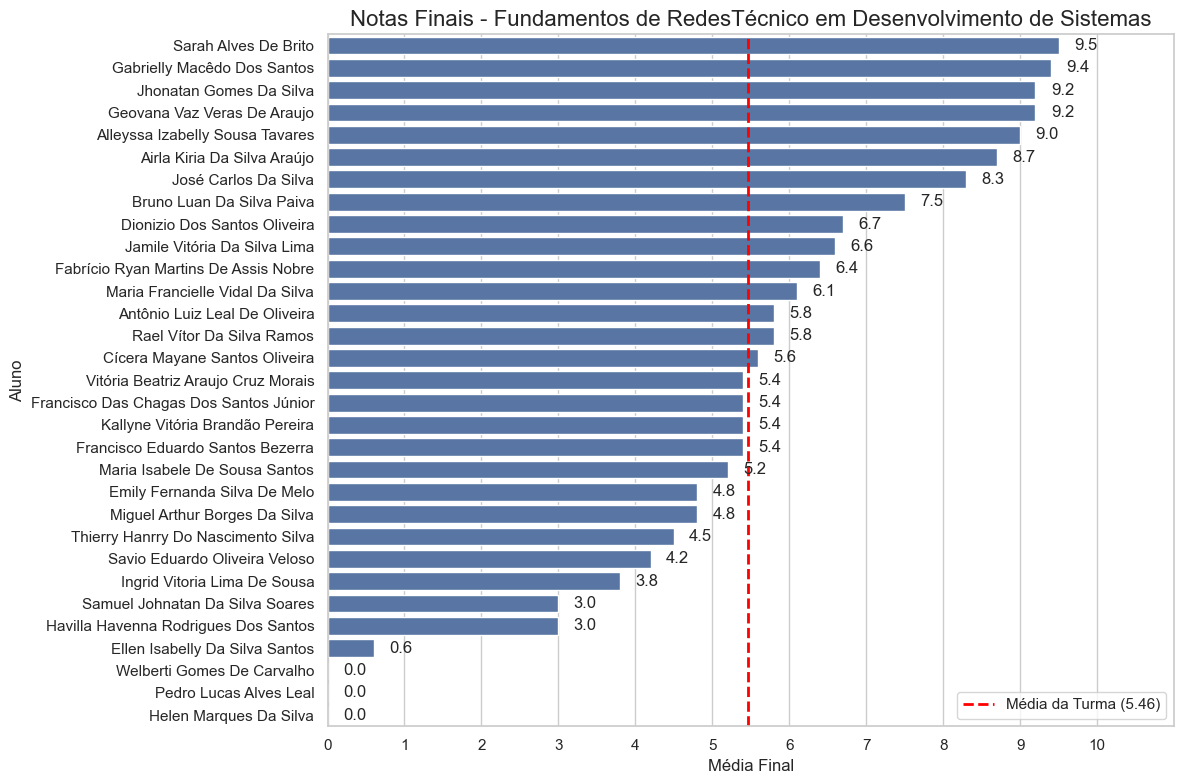

In [ ]:
if not df_filtrado.empty:
    df_plot = df_filtrado.sort_values('media_final', ascending=False)
    
    media_geral_turma = df_plot['media_final'].mean()
    
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(data=df_plot, x='media_final', y='aluno', orient='h')
    
    for p in ax.patches:
        width = p.get_width()
        ax.text(width + 0.2, p.get_y() + p.get_height() / 2, f'{width:.1f}', va='center')
    
    ax.axvline(x=media_geral_turma, color='red', linestyle='--', linewidth=2, label=f'Média da Turma ({media_geral_turma:.2f})')
    ax.legend()
    
    ax.set_xlim(0, 11)
    plt.title(f'Notas Finais - {disciplina_selecionada}{curso_selecionado}', fontsize=16)
    plt.xlabel('Média Final', fontsize=12)
    plt.ylabel('Aluno', fontsize=12)
    plt.xticks(np.arange(0, 11, 1))
    plt.tight_layout()
    
    output_png_path = f'output/relatorio_notas_{curso_selecionado}_{disciplina_selecionada}.png'
    plt.savefig(output_png_path, dpi=300, bbox_inches='tight')
    
    print(f"Gráfico atualizado salvo em: {output_png_path}")
    plt.show()
else:
    print("Não há dados para gerar o gráfico.")

### 8. Exportação para PDF
O relatório em PDF agora diferencia notas baixas em vermelho.

In [20]:
def gerar_pdf_simples(df_dados, curso, disciplina):
    pdf = FPDF()
    pdf.add_page()
    pdf.set_font("Arial", 'B', 16)
    
    pdf.cell(0, 10, 'Relatório de Notas', 0, 1, 'C')
    pdf.set_font("Arial", '', 12)
    pdf.cell(0, 10, f'Curso: {curso}', 0, 1, 'L')
    pdf.cell(0, 10, f'Disciplina: {disciplina}', 0, 1, 'L')
    pdf.ln(10)
    
    pdf.set_font("Arial", 'B', 10)
    col_widths = [70, 20, 20, 30, 30]
    headers = ['Aluno', 'AV1', 'AV2', 'Média Final', 'Status']
    for i, header in enumerate(headers):
        pdf.cell(col_widths[i], 10, header, 1, 0, 'C')
    pdf.ln()

    pdf.set_font("Arial", '', 10)
    df_dados_sorted = df_dados.sort_values('media_final', ascending=False)
    for _, row in df_dados_sorted.iterrows():
        # Célula do Aluno (sempre preta)
        aluno = str(row.get('aluno', 'N/A')).encode('latin-1', 'replace').decode('latin-1')
        pdf.cell(col_widths[0], 10, aluno, 1)
        
        # --- LÓGICA DE COR PARA NOTAS --- 
        # Nota AV1
        av1_val = row.get('av1', 0)
        if av1_val < 6:
            pdf.set_text_color(255, 0, 0) # Vermelho
        pdf.cell(col_widths[1], 10, str(av1_val), 1, 0, 'C')
        pdf.set_text_color(0, 0, 0) # Reseta para preto
        
        # Nota AV2
        av2_val = row.get('av2', 0)
        if av2_val < 6:
            pdf.set_text_color(255, 0, 0) # Vermelho
        pdf.cell(col_widths[2], 10, str(av2_val), 1, 0, 'C')
        pdf.set_text_color(0, 0, 0) # Reseta para preto
        
        # Média Final
        media_val = row.get('media_final', 0)
        if media_val < 6:
            pdf.set_text_color(255, 0, 0) # Vermelho
        pdf.cell(col_widths[3], 10, str(media_val), 1, 0, 'C')
        pdf.set_text_color(0, 0, 0) # Reseta para preto
        
        # Status
        status = str(row.get('status', 'N/A'))
        if status == 'Reprovado':
            pdf.set_text_color(255, 0, 0) # Vermelho
        pdf.cell(col_widths[4], 10, status, 1, 0, 'C')
        pdf.set_text_color(0, 0, 0) # Reseta para preto
        
        pdf.ln()
        
    output_pdf_path = f'output/relatorio_notas_{curso}_{disciplina}.pdf'
    pdf.output(output_pdf_path, 'F')
    return output_pdf_path

if not df_filtrado.empty:
    colunas_pdf = ['aluno', 'av1', 'av2', 'media_final', 'status']
    caminho_pdf = gerar_pdf_simples(df_filtrado[colunas_pdf], curso_selecionado, disciplina_selecionada)
    print(f"Relatório em PDF com cores salvo em: {caminho_pdf}")
else:
    print("Nenhum dado para gerar o PDF.")

Relatório em PDF com cores salvo em: output/relatorio_notas_Técnico em Desenvolvimento de Sistemas_Fundamentos de Redes.pdf
